# Liver Model Construction: Huge Core Model

In [1]:
import os
import re
import warnings
from cobra.io import *
from cobra.io.json import *
import escher
import mass
import numpy as np
import pandas as pd
import equilibrator_api
from equilibrator_api import ComponentContribution, Q_
import sympy as sym
from cobra import Model, Reaction, Metabolite
import cobra.test
from os.path import join
from mass.util import qcqa, qcqa_model
from cobra import DictList
from mass import (
    MassConfiguration, MassMetabolite, MassModel,
    MassReaction, Simulation, UnitDefinition)
from mass.io.json import save_json_model as save_json_mass_model
from mass.visualization import plot_comparison, plot_time_profile, plot_ensemble_phase_portrait, plot_ensemble_time_profile
mass_config = MassConfiguration()
mass_config.irreversible_Keq = float("inf")
print("MASSpy version: {0}".format(mass.__version__))
from six import iteritems
import matplotlib.pyplot as plt
from mass.thermo import (
    ConcSolver, sample_concentrations,
    update_model_with_concentration_solution)
# adding Folder_2 to the system path
sys.path.insert(0, "c:\\Users\\sicil\\LiverModel")
from cobra_dict import *
import cobra_dict as c_d
import csv
import altair as alt
from minspan.minspan import minspan,nnz
import sys
# from minspan import minspan,nnz

MASSpy version: 0.1.6


In [2]:
mass.__version__

'0.1.6'

In [3]:
maps_dir = os.path.abspath("maps")
data_dir = os.path.abspath("data")
dir = os.path.abspath("")
model_dir = os.path.abspath("models")
minspan_dir= os.path.abspath("minspans_csv")


### Getting reactions and metabolite data from RECON 3D

In [4]:
# making dataframe of metabolites

csv_met = os.path.join(data_dir,"big_core_met_df.csv")
met_csv_df = pd.read_csv(csv_met,index_col="id")
metabolite_info=met_csv_df.to_dict(orient='index')


### Loading cobra model

In [5]:
# Initiate empty model
trial= cobra.Model()

Set parameter Username
Academic license - for non-commercial use only - expires 2023-07-02


In [6]:
#  Add all the remaining metabolites involved in the pathway
for met_id, info in metabolite_info.items():
    met = cobra.Metabolite(met_id, name=info['name'], formula=info['formula'], 
                           charge=info['charge'], compartment=info['compartment'])
    trial.add_metabolites(met)
    

In [7]:
# Loading reaction data as JSON file to maintain data types as dictionaries 
rxn_json = os.path.join(data_dir,"big_core_reaction_df.json")
with open(rxn_json) as json_file:
    rxn_data = json.load(json_file)

In [8]:
for reaction, info in rxn_data.items():
    reaction_obj = cobra.Reaction(reaction)
    reaction_obj.id=reaction
    reaction= reaction_obj.id
    reaction_obj.lower_bound = info['lower_bound']
    reaction_obj.upper_bound = info['upper_bound']
    reaction_obj.name = info['name']
    trial.add_reaction(reaction_obj)
    temp=info['metabolites']
    reaction_obj.add_metabolites(temp)
    # print(reaction)

In [9]:
#Mass balance check
for r in trial.reactions:
    print(r.id,  r.check_mass_balance())

CSm {'charge': -1.0}
ACONTm {}
ICDHxm {}
AKGDm {}
SUCOASm {'charge': 2.0}
SUCD1m {}
FUMm {}
MDHm {'charge': -1.0}
NADH2_u10mi {'charge': 1.0}
FADH2ETC {}
CYOR_u10mi {'charge': -2.0}
CYOOm2i {'charge': 4.0}
ATPS4mi {'charge': -1.0}
Htmi {}
HEX1 {'charge': -1.0}
PGI {}
PFK {'charge': -1.0}
FBA {}
TPI {}
GAPD {'charge': -3.0}
PGK {}
PGM {}
ENO {}
PYK {'charge': 1.0}
ADK1 {}
PDHm {}
LDH_L {'charge': -1.0}
G6PDH2r {'charge': -1.0}
PGL {'charge': -1.0}
GND {}
RPI {}
RPE {}
TKT1 {}
TKT2 {}
TALA {}
PCm {'charge': 1.0}
PEPCKm {}
FBP {'charge': 2.0}
G6PPer {'charge': 2.0}
G6Pter {}
GLCter {}
MALtm {}
MDH {'charge': -1.0}
PEPCK_re {}
PGMT {}
GALUi {'charge': 1.0}
GLGNS1 {'charge': -3.0}
GLBRAN {}
GLPASE1 {'charge': -6.0}
GLDBRAN {}
GLPASE2 {}
GGNG {'charge': -8.0}
ACACT1m {}
HMGCOASm {'charge': 1.0}
HMGLm {}
ADCim {'charge': 1.0}
BDHm {'charge': -1.0}
OCOAT1m {}
NDPK1 {}
NDPK1m {}
NDPK2 {}
HCO3Em {'charge': -1.0}
ATPtm {}
AKGMALtm {}
ASPTA {}
ASPTAm {}
CITtam {}
CITL {}
ME2 {}
ACS {}
ARGN {}
OCBT

In [10]:
trial.metabolites.h_c.charge= 1
trial.metabolites.h_m.charge= 1
trial.metabolites.h_i.charge= 1
trial.metabolites.pi_c.charge= -2
trial.metabolites.pi_m.charge= -2

In [11]:
for r in trial.reactions:
    print(r.id,  r.check_mass_balance())

CSm {}
ACONTm {}
ICDHxm {}
AKGDm {}
SUCOASm {}
SUCD1m {}
FUMm {}
MDHm {}
NADH2_u10mi {}
FADH2ETC {}
CYOR_u10mi {}
CYOOm2i {}
ATPS4mi {}
Htmi {}
HEX1 {}
PGI {}
PFK {}
FBA {}
TPI {}
GAPD {}
PGK {}
PGM {}
ENO {}
PYK {}
ADK1 {}
PDHm {}
LDH_L {}
G6PDH2r {}
PGL {}
GND {}
RPI {}
RPE {}
TKT1 {}
TKT2 {}
TALA {}
PCm {}
PEPCKm {}
FBP {}
G6PPer {'charge': 2.0}
G6Pter {}
GLCter {}
MALtm {}
MDH {}
PEPCK_re {}
PGMT {}
GALUi {}
GLGNS1 {}
GLBRAN {}
GLPASE1 {}
GLDBRAN {}
GLPASE2 {}
GGNG {}
ACACT1m {}
HMGCOASm {}
HMGLm {}
ADCim {}
BDHm {}
OCOAT1m {}
NDPK1 {}
NDPK1m {}
NDPK2 {}
HCO3Em {}
ATPtm {}
AKGMALtm {}
ASPTA {}
ASPTAm {}
CITtam {}
CITL {}
ME2 {}
ACS {}
ARGN {}
OCBTm {}
ARGSS {}
ARGSL {}
CBPSam {}
NH4tm {}
GDHm {}
GLNS {}
GLUN {}
ALATA_L {}
CYSO {}
3SALATAi {}
3SPYRSP {}
PGCD {}
PSERT {}
PSP_L {}
GHMT2r {}
ASNS1 {}
GLYtm {}
MLTHFtm {}
THFtm {}
KHK {}
FBA2 {}
TRIOK {}
ALCD19y {}
GLYK {}
2AMACHYD {}
SERHL {}
ALCD2x {}
ACALDtm {}
ALDD2xm {}
ACSm {}
Htm {}
O2tm {}
H2Otr {}
H2Otm {}
PItm {}
PItr {'charge'

In [12]:
trial.objective = 'ATPS4mi'
flux= trial.optimize()
flux
# df= flux.to_frame()
# df.loc["EX_glc__D_c"]
# flux.loc["EX_glc__D_c"]

,fluxes,reduced_costs
CSm,2.0,0.0
ACONTm,2.0,0.0
ICDHxm,2.0,0.0
AKGDm,2.0,0.0
SUCOASm,28.0,0.0
...,...,...
EX_nh4_c,0.0,0.0
EX_so3_c,0.0,0.0
EX_etoh_c,0.0,-5.0
EX_glyc_3octa_c,0.0,0.0


In [13]:
#Function to load data from the excel sheet
def load_data(filepath, sheet_name):
    """Load Liver data from an excel sheet"""
    df = pd.read_excel(engine='openpyxl',
        io=filepath,
        sheet_name=sheet_name,
        index_col=0)
    return df

In [14]:
#Compare Results
excel_ic = os.path.join(data_dir,"Fluxes_Data.xlsx")
# ic_df = pd.read_csv(csv_ic)
# ic_df.set_index()
fluxes = load_data(
    filepath=excel_ic,
    sheet_name="Model_data"
    )
# ic_info_all.reset_index(level='ID', col_level=1, inplace=True)
fluxes

,val
met,
glygn2_c,-0.015600
ala__L_c,-0.096667
nh4_c,-0.090533
gly_c,-0.015827
gln__L_c,-0.034667
ser__L_c,-0.009720
glc__D_c,-0.037452


In [15]:
print("Setting Experimental fluxes\n------------------")

for reaction in trial.reactions:
    #Setting inital condition of metabolties from HEPATOKIN  #M 
    if 'EX_' in reaction.id:
        for met in reaction.metabolites:
            # print(met)
            if met.id in fluxes.index:
                mid=met.id
                # print(mid)
                flux = fluxes.loc[mid,'val']
                # print(flux)
            #     row = [mid,ic_value]
            #     # column = [ic_value]
            #     # conc_df.append(row)
                reaction.lower_bound =  flux       
                reaction.upper_bound =  -flux     #mol/L*hr = M/hr
                
                print(reaction.id, reaction.lower_bound, reaction.upper_bound)       
# for metabolite, ic_value in liver.initial_conditions.items():
#     print("{0}: {1}".format(metabolite, ic_value))

Setting Experimental fluxes
------------------
EX_glc__D_c -0.0374517 0.0374517
EX_gln__L_c -0.0346666666666667 0.0346666666666667
EX_ser__L_c -0.00972 0.00972
EX_gly_c -0.015826666666666666 0.015826666666666666
EX_glygn2_c -0.015600000000000001 0.015600000000000001
EX_ala__L_c -0.09666666666666666 0.09666666666666666
EX_nh4_c -0.09053333333333334 0.09053333333333334


In [16]:
for r in trial.reactions:
    if 'EX_' in r.id:
    
        print(r.id, r.lower_bound, r.upper_bound)

EX_h_c -1000.0 1000.0
EX_pyr_c 0.0 1000.0
EX_h2o_c -1000.0 1000.0
EX_pi_c -1000.0 1000.0
EX_glc__D_c -0.0374517 0.0374517
EX_lac__L_c 0.0 1000.0
EX_co2_c 0.0 1000.0
EX_o2_c -1000.0 1000.0
EX_octa_prod_c 0.0 1000.0
EX_octa_cons_c 0.0 0.0
EX_urea_c 0.0 1000.0
EX_gln__L_c -0.0346666666666667 0.0346666666666667
EX_acetone_c 0.0 1000.0
EX_bhb_c 0.0 1000.0
EX_glu__L_c 0.0 1000.0
EX_ser__L_c -0.00972 0.00972
EX_cys__L_c 0.0 1000.0
EX_gly_c -0.015826666666666666 0.015826666666666666
EX_glygn2_c -0.015600000000000001 0.015600000000000001
EX_Tyr_ggn_c -1000.0 1000.0
EX_ala__L_c -0.09666666666666666 0.09666666666666666
EX_nh4_c -0.09053333333333334 0.09053333333333334
EX_so3_c 0.0 1000.0
EX_etoh_c 0.0 1000.0
EX_glyc_3octa_c 0.0 1000.0
EX_fru_c 0.0 1000.0


In [17]:
trial.reactions.EX_lac__L_c     

Reaction identifier,EX_lac__L_c
Name,
Memory address,0x01fdd0d26280
Stoichiometry,lac__L_c --> L-Lactate -->
GPR,
Lower bound,0.0
Upper bound,1000.0


In [18]:
# futile_cycle_1 = trial.problem.Constraint(
#     trial.reactions.PFK.flux_expression - trial.reactions.FBP.flux_expression,
#     lb=-60,
#     ub=60)
# trial.add_cons_vars(futile_cycle_1)


# futile_cycle_2 = trial.problem.Constraint(
#     trial.reactions.HEX1.flux_expression - trial.reactions.G6PPer.flux_expression,
#     lb=-1000,
#     ub=1000)
# trial.add_cons_vars(futile_cycle_2)

# # try doubling the two above because of the 2:1 ratio
# futile_cycle_3 = trial.problem.Constraint(
#     trial.reactions.PYK.flux_expression - trial.reactions.PCm.flux_expression,
#     lb=-20,
#     ub=20)
# trial.add_cons_vars(futile_cycle_3)

In [19]:
dual_objective = trial.problem.Objective(
    -trial.reactions.EX_glc__D_c.flux_expression-
    trial.reactions.EX_glygn2_c.flux_expression,
    direction='max')
trial.objective = dual_objective
solution = trial.optimize(objective_sense='minimise')
# try adding ratios of glycogen to glucose in objective function
# try making the flux reactons of PGI, GLUT2, 
solution

,fluxes,reduced_costs
CSm,0.418103,0.0
ACONTm,0.418103,0.0
ICDHxm,0.418103,0.0
AKGDm,0.418103,0.0
SUCOASm,5.853448,0.0
...,...,...
EX_nh4_c,0.000000,-0.0
EX_so3_c,0.000000,0.0
EX_etoh_c,0.000000,-0.0
EX_glyc_3octa_c,0.000000,0.0


In [20]:
# #Escher FBA: shows the solutions on the map
initial_flux_data = {
    reaction: flux
    for reaction, flux in solution.fluxes.items()}


#view all the reactions that we need build
escher_builder = escher.Builder(
    # model=trial,
    map_json=os.path.join(
        maps_dir,"core_map_v23.json")
        # ,highlight_missing=True
    , reaction_data=initial_flux_data
    )

# Display map in notebook
escher_builder

Builder(reaction_data={'CSm': 0.4181034, 'ACONTm': 0.4181034, 'ICDHxm': 0.4181034, 'AKGDm': 0.4181034, 'SUCOAS…

In [21]:
from cobra.util.solver import linear_reaction_coefficients
from cobra.io import json

In [22]:
linear_reaction_coefficients(trial)

{<Reaction EX_glc__D_c at 0x1fdd0d26fd0>: -1.0,
 <Reaction EX_glygn2_c at 0x1fdd0d34df0>: -1.0}

## Solution Space (sampling)




sampling 4 different flux states and seeing overlap in distributions

In [23]:
combined =trial.copy()
dual_objective = combined.problem.Objective(
    +combined.reactions.EX_glc__D_c.flux_expression+
    combined.reactions.EX_glygn2_c.flux_expression,
    direction='min')
combined.objective = dual_objective
flux_solution = trial.optimize(objective_sense='minimise')
# flux_solution = combined.optimize()
# co = combined.problem.Constraint(combined.reactions.EX_glc__D.flux_expression, lb=0)
# combined.add_cons_vars([co])


data_1 = cobra.sampling.sample(combined, 5000, method = "optgp", processes = 4)


Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpnkca6s7k.lp
Reading time = 0.02 seconds
: 179 rows, 374 columns, 1420 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpajdxx89y.lp
Reading time = 0.01 seconds
: 179 rows, 374 columns, 1420 nonzeros


In [24]:
combined =trial.copy()
dual_objective = combined.problem.Objective(
    +combined.reactions.EX_glc__D_c.flux_expression+
    combined.reactions.EX_glygn2_c.flux_expression,
    direction='max')
combined.objective = dual_objective
flux_solution = trial.optimize(objective_sense='minimise')
# flux_solution = combined.optimize()
# co = combined.problem.Constraint(combined.reactions.EX_glc__D.flux_expression, lb=0)
# combined.add_cons_vars([co])


data_2 = cobra.sampling.sample(combined, 5000, method = "optgp", processes = 4)

Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmp3gwlx62x.lp
Reading time = 0.01 seconds
: 179 rows, 374 columns, 1420 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmp050k_9np.lp
Reading time = 0.01 seconds
: 179 rows, 374 columns, 1420 nonzeros


In [25]:
combined =trial.copy()
dual_objective = combined.problem.Objective(
    +combined.reactions.EX_glc__D_c.flux_expression-
    combined.reactions.EX_glygn2_c.flux_expression,
    direction='min')
combined.objective = dual_objective
flux_solution = trial.optimize(objective_sense='minimise')
# flux_solution = combined.optimize()
# co = combined.problem.Constraint(combined.reactions.EX_glc__D.flux_expression, lb=0)
# combined.add_cons_vars([co])


data_3 = cobra.sampling.sample(combined, 5000, method = "optgp", processes = 4)


Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpc6sp308w.lp
Reading time = 0.01 seconds
: 179 rows, 374 columns, 1420 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpo13m0x0g.lp
Reading time = 0.01 seconds
: 179 rows, 374 columns, 1420 nonzeros


In [26]:
combined =trial.copy()
dual_objective = combined.problem.Objective(
    +combined.reactions.EX_glc__D_c.flux_expression-
    combined.reactions.EX_glygn2_c.flux_expression,
    direction='max')
combined.objective = dual_objective
flux_solution = trial.optimize(objective_sense='minimise')
# flux_solution = combined.optimize()
# co = combined.problem.Constraint(combined.reactions.EX_glc__D.flux_expression, lb=0)
# combined.add_cons_vars([co])


data_4 = cobra.sampling.sample(combined, 5000, method = "optgp", processes = 4)


Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpo0imi6n6.lp
Reading time = 0.01 seconds
: 179 rows, 374 columns, 1420 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpcjfhv0pf.lp
Reading time = 0.01 seconds
: 179 rows, 374 columns, 1420 nonzeros


In [27]:
# df
mean_flux_1 = pd.DataFrame( columns =["reaction","mean", "stdev"])
# means =[]
# std=[]
for i in data_1.columns:
    mean = data_1[i].mean()
    # print(index)
    # means.append(index)
    std = data_1[i].std()
    mean_flux_1.loc[len(mean_flux_1.index)] = [i, mean, std]
# mean_flux["Mean_gluco"] = means
# mean_flux["ST_dev_gluco"] = std
mean_flux = mean_flux_1.set_index("reaction")
mean_flux

,mean,stdev
reaction,,
CSm,0.254255,0.059664
ACONTm,0.213614,0.059191
ICDHxm,0.213614,0.059191
AKGDm,0.212652,0.061900
SUCOASm,0.149664,0.326083
...,...,...
EX_nh4_c,0.002981,0.034520
EX_so3_c,0.000000,0.000000
EX_etoh_c,0.000000,0.000000


In [28]:
x_position = mean_flux.loc["PFK", "mean"]

In [29]:
# importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

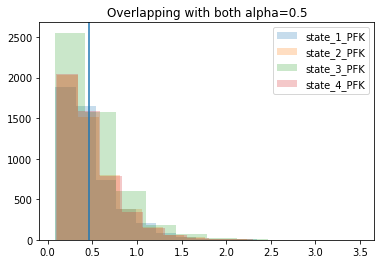

In [30]:
plt.hist(data_1['PFK'], 
         alpha=0.25, # the transaparency parameter
         label='state_1_PFK')
plt.axvline(x_position)
  
plt.hist(data_2['PFK'], 
         alpha=0.25, # the transaparency parameter
         label='state_2_PFK')

plt.hist(data_3['PFK'], 
         alpha=0.25, # the transaparency parameter
         label='state_3_PFK')        

plt.hist(data_4['PFK'], 
         alpha=0.25, # the transaparency parameter
         label='state_4_PFK')        
  
plt.legend(loc='upper right')
plt.title('Overlapping with both alpha=0.5')
plt.show()

the flux states of PGI looks weird cuz it's supposed to be positive and negative

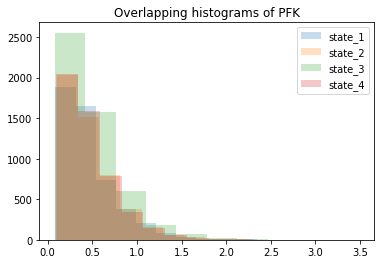

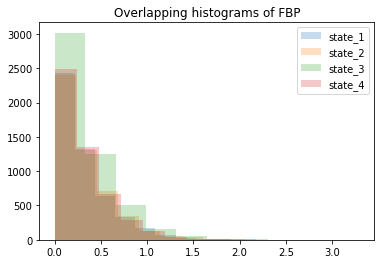

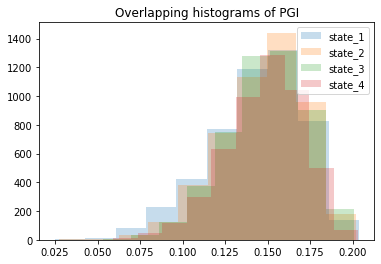

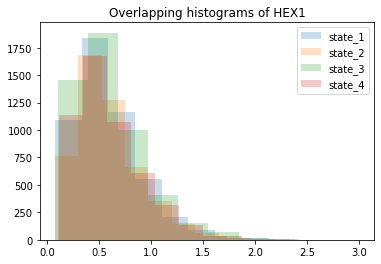

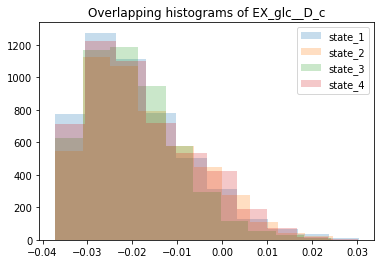

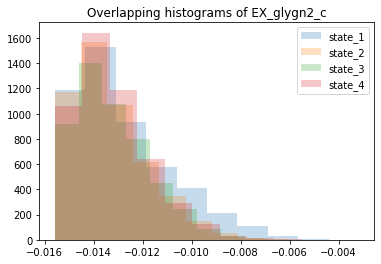

In [31]:
list_rxn =['PFK', 'FBP', "PGI", "HEX1", "EX_glc__D_c", "EX_glygn2_c"]
#  GAPDH, ENO, FBA, PGI, PGMT
for i in list_rxn:
    plt.hist(data_1[i], 
         alpha=0.25, # the transaparency parameter
         label='state_1')
#     x_position = mean_flux.loc[i, "mean"]
  
    plt.hist(data_2[i], 
            alpha=0.25, # the transaparency parameter
            label='state_2')
    x_position = mean_flux.loc[i, "mean"]

    plt.hist(data_3[i], 
            alpha=0.25, # the transaparency parameter
            label='state_3')     
    x_position = mean_flux.loc[i, "mean"]

    plt.hist(data_4[i], 
            alpha=0.25, # the transaparency parameter
            label='state_4')        
    
    plt.legend(loc='upper right')
    plt.title('Overlapping histograms of '+str(i))
    plt.show()

NameError: name 'df' is not defined

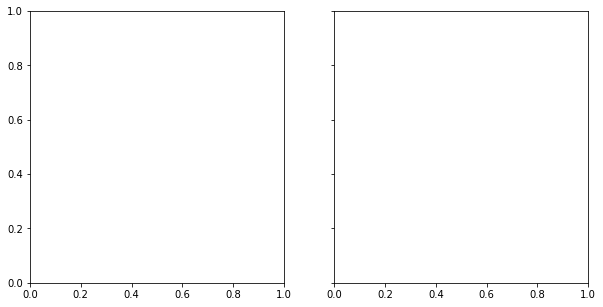

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
ax = axes[0]
df['GLGNS1'].hist(ax=ax)
ax.set_xlabel('GLGNS1 flux')
ax.set_ylabel('Number of solutions')

ax = axes[1]
ax = df['GLPASE1'].hist(ax=ax)
ax.set_xlabel('GLPASE1 flux')

In [ ]:
# df
mean_flux = pd.DataFrame( columns =["reaction","mean", "stdev"])
# means =[]
# std=[]
for i in df.columns:
    mean = df[i].mean()
    # print(index)
    # means.append(index)
    std = df[i].std()
    mean_flux.loc[len(mean_flux.index)] = [i, mean, std]
# mean_flux["Mean_gluco"] = means
# mean_flux["ST_dev_gluco"] = std
mean_flux

In [ ]:
from tqdm import tqdm
from scipy.integrate import solve_ivp

# dFBA analysis

In [ ]:
def add_dynamic_bounds(trial, y):
    """Use external concentrations to bound the uptake flux of glucose."""
    atpm, glucose = y  # expand the boundary species
    glucose_max_import = -10 * glucose / (5 + glucose)
    trial.reactions.EX_glc__D_c.lower_bound = glucose_max_import


def dynamic_system(t, y):
    """Calculate the time derivative of external species."""

    atpm, glucose = y  # expand the boundary species

    # Calculate the specific exchanges fluxes at the given external concentrations.
    with trial:
        add_dynamic_bounds(trial, y)

        cobra.util.add_lp_feasibility(trial)
        feasibility = cobra.util.fix_objective_as_constraint(trial)
        lex_constraints = cobra.util.add_lexicographic_constraints(
            trial, ['EX_glygn2_c', 'EX_glc__D_c'], ['max', 'max'])
# try max and mim 
    # Since the calculated fluxes are specific rates, we multiply them by the
    # biomass concentration to get the bulk exchange rates.
    fluxes = lex_constraints.values
    # fluxes *= atpm

    # This implementation is **not** efficient, so I display the current
    # simulation time using a progress bar.
    if dynamic_system.pbar is not None:
        dynamic_system.pbar.update(1)
        dynamic_system.pbar.set_description('t = {:.3f}'.format(t))

    return fluxes

dynamic_system.pbar = None


def infeasible_event(t, y):
    """
    Determine solution feasibility.

    Avoiding infeasible solutions is handled by solve_ivp's built-in event detection.
    This function re-solves the LP to determine whether or not the solution is feasible
    (and if not, how far it is from feasibility). When the sign of this function changes
    from -epsilon to positive, we know the solution is no longer feasible.

    """

    with trial:

        add_dynamic_bounds(trial, y)

        cobra.util.add_lp_feasibility(trial)
        feasibility = cobra.util.fix_objective_as_constraint(trial)

    return feasibility - infeasible_event.epsilon

infeasible_event.epsilon = 1E-6
infeasible_event.direction = 1
infeasible_event.terminal = True

In [ ]:
ts = np.linspace(0, 15, 100)  # Desired integration resolution and interval
y0 = [0.1, 10]

with tqdm() as pbar:
    dynamic_system.pbar = pbar

    sol = solve_ivp(
        fun=dynamic_system,
        events=[infeasible_event],
        t_span=(ts.min(), ts.max()),
        y0=y0,
        t_eval=ts,
        rtol=1e-6,
        atol=1e-8,
        method='BDF'
    )

In [ ]:
ax = plt.subplot(111)
ax.plot(sol.t, sol.y.T[:, 0])
ax2 = plt.twinx(ax)
ax2.plot(sol.t, sol.y.T[:, 1], color='r')

ax.set_ylabel('Glycogen', color='b')
ax2.set_ylabel('Glucose', color='r')

### Making Df of metabolites and reactions, exporting them, and importing to form MASS model

In [ ]:
from cobra_dict import metabolite_to_dict as metabolite_to_dict
from cobra_dict import reaction_to_dict as reaction_to_dict

In [ ]:
met_df=pd.DataFrame()
for met in trial.metabolites:
    cobra_met= trial.metabolites.get_by_id(met.id)
    m=metabolite_to_dict(cobra_met)
    df_2=pd.DataFrame.from_dict(m,orient='index')
    df_2=df_2.T
    met_df=pd.concat([met_df, df_2])
met_df=met_df.set_index('id')
met_df

In [ ]:
csv_met_cobra = os.path.join(data_dir,"core_cobra_met.csv")
met_df.to_csv(csv_met_cobra)

In [ ]:
rxn_df=pd.DataFrame()
for rxn in trial.reactions:
    cobra_rxn= trial.reactions.get_by_id(rxn.id)
    r=reaction_to_dict(cobra_rxn)
#     print(r)
    df=pd.DataFrame.from_dict(r,orient='index')
    df=df.T
    rxn_df= pd.concat([rxn_df, df])
rxn_df=rxn_df.set_index('id')
# rxn_df

In [ ]:
json_rxn_cobra = os.path.join(data_dir,"core_cobra_rxn.json")
rxn_df.to_json(json_rxn_cobra,orient="index")

## Making MASS model of glycolysis

In [ ]:
liver= MassModel("Core_Model", array_type='DataFrame', dtype=np.int64)

#### Add the pathway metabolites and their information to a new MASS model from COBRA model

In [ ]:
# making dataframe of metabolites
import json
met_csv_df = pd.read_csv(csv_met_cobra,index_col="id")
mass_metabolite_info=met_csv_df.to_dict(orient='index')

# Loading reaction data as JSON file to maintain data types as dictionaries 

with open(json_rxn_cobra) as json_file:
    mass_rxn_data = json.load(json_file)

In [ ]:
#  Add all the remaining metabolites involved in the pathway
for met_id, info in mass_metabolite_info.items():
    met = MassMetabolite(met_id, name=info['name'], formula=info['formula'], 
                           charge=info['charge'], compartment=info['compartment'])
    # print(met.compartment)
    liver.add_metabolites(met)

In [ ]:
for reaction, info in mass_rxn_data.items():
    reaction_obj = MassReaction(reaction)
    reaction_obj.id = reaction
    reaction= reaction_obj.id
    reaction_obj.lower_bound = info['lower_bound']
    reaction_obj.upper_bound = info['upper_bound']
    reaction_obj.name = info['name']
    liver.add_reactions(reaction_obj)
    temp=info['metabolites']
    reaction_obj.add_metabolites(temp)
    # print(reaction)

In [ ]:
liver.reactions.PGK.reverse_stoichiometry(inplace=True)
liver.reactions.PGM.reverse_stoichiometry(inplace=True)

## Setting initial conditions

In [ ]:
import csv
import openpyxl

In [ ]:
#Function to load data from the excel sheet
def load_data(filepath, sheet_name):
    """Load Liver data from an excel sheet"""
    df = pd.read_excel(engine='openpyxl',
        io=filepath,
        sheet_name=sheet_name,
        index_col=0)
    return df

In [ ]:
#Compare Results
excel_ic = os.path.join(data_dir,"Concentrations2.xlsx")
# ic_df = pd.read_csv(csv_ic)
# ic_df.set_index()
ic_info_all = load_data(
    filepath=excel_ic,
    sheet_name="Concentrations")
ic_info_all.reset_index(level='ID', col_level=1, inplace=True)
ic_info_all

In [ ]:
conc_df =pd.DataFrame(ic_info_all.loc[:,["ID","Concentration (M)"]])
conc_df.set_index('ID',drop=True,inplace=True)
conc_df

In [ ]:
# new_index= []
# for i in conc_df.index:
#     base = conc_df.index.get_loc(i)
#     # print(base)
#     # l = len(i)
#     # new = i[:l-2]
#     # new_index.append(new)
#     # print(new)
#     # conc_df.index.get_loc(base) = new
#     # new_id = i.rpartition("_" + str(met.compartment))[0]

# conc_df= conc_df.reset_index(drop=True)
# conc_df["ID"] = new_index
# conc_df.set_index('ID',drop=True,inplace=True)
# conc_df

In [ ]:
print("Initial Conditions\n------------------")

for reaction in liver.reactions:
    #Setting inital condition of metabolties from HEPATOKIN  #M 
    for met in reaction.metabolites:
        if met.id in conc_df.index:
            mid=met.id
            metabolite = reaction.metabolites
            ic_value = conc_df.loc[mid,'Concentration (M)']
            # print(ic_value)
            # row = [mid,ic_value]
            # column = [ic_value]
            # conc_df.append(row)
            met.ic =  ic_value    
                    
for metabolite, ic_value in liver.initial_conditions.items():
    print("{0}: {1}".format(metabolite, ic_value))

In [ ]:
for i in liver.metabolites:
    print(i.compartment)

### Getting Standard and Physiological Gibbs energies of reactions to get Keq of reactions

In [ ]:
met_list = []
liver.boundary_conditions
for reaction in liver.boundary_conditions:
    print(reaction)

In [ ]:
excluded_reactions=["ATPM", "NADHM","PYRt2m","PEPtm"]


In [ ]:
for reaction in liver.boundary:
    excluded_reactions.append(reaction.id)
    reaction.Keq=1    # Setting Keq
    print(reaction,reaction.Keq)

In [ ]:
for i in liver.metabolites:
    print(i,i.compartment)
    # i.compartment = "cytosol"

In [ ]:
occoa_prod_c nan
octa_prod_c nan
glyc3p_1octa_c nan
glyc3p_2octa_c nan
glyc_2octa_c nan
glyc_3octa_c nan
ACP_c nan
malACP_c nan
acACP_c nan
actACP_c nan
3haACP_c nan
but2eACP_c nan
butACP_c nan
3ohexACP_c nan
3hhexACP_c nan
thex2eACP_c nan
hexACP_c nan
3ooctACP_c nan
3hoctACP_c nan
toct2eACP_c nan
oc2coa_m nan
3hocoa_m nan
3oocoa_m nan
hxcoa_m m
hx2coa_m m
3hhcoa_m nan
3ohcoa_m nan
btcoa_m m
b2coa_m m
3hbcoa_m m
octa_cons_c nan


In [ ]:
# Reactions that we don't want to get Keq from equilibrator [exchanges and psuedoreactions] SET THESE MANUALLY
# Setting Keq and kf for boundary reactions
print("Boundary Reactions and Values\n-----------------------------")

for reaction in liver.boundary:
    excluded_reactions.append(reaction.id)
    reaction.Keq=1    # Setting Keq
    reaction.kf=1e6     # Setting kf
    #Setting boundary condition metabolties from ic of metabolite from HEPATOKIN   
    for met in reaction.reactants:
        if met.id in conc_df.index:
            mid=met.id
            boundary_met = reaction.boundary_metabolite
            bcvalue = conc_df.loc[mid,'Concentration (M)']
            liver.boundary_conditions[boundary_met] =  bcvalue
            bc_value = liver.boundary_conditions.get(boundary_met)
            print("{0}\n{1}: {2}\n".format(reaction, boundary_met, bc_value))

In [ ]:
reaction_str= []
cc = ComponentContribution()
# optional: changing the aqueous environment parameters
cc.p_h = Q_(7.4)
cc.p_mg = Q_(3.31)
cc.ionic_strength = Q_("0.144M")


cc.temperature = Q_("310.15K")
R = 0.00831446261815324 #R = 0.00831446261815324 kJ/mol
from numpy import *
Keq_df=pd.DataFrame(columns=["Reaction","Keq"])
# Keq_df

In [ ]:
# Getting Keq from equilibrator by forming a reaction string that it can parse through
for reaction in liver.reactions:
    if reaction.id not in excluded_reactions:
        reactants = []
        #forming reaction string 
        for met in reaction.reactants:
            id_coeff= reaction.get_coefficient(met)
            new_id = met.id
            new_id = met.id.rpartition("_" + str(met.compartment))[0] #removing compartment lettes, for eg "_c"
            if id_coeff == 1 or id_coeff == -1:
                new_id = "bigg.metabolite:" + new_id
            else:
                new_id = str(id_coeff) + " bigg.metabolite:" + new_id

            reactants.append(new_id)   
        reactants_string= " + ".join(reactants)
        reactants_string = str(reactants_string + " = ")

        # Forming product string
        products = []
        for met in reaction.products:
            new_id = met.id
            new_id = met.id.rpartition("_" + str(met.compartment))[0] # removing compartment lettes, for eg "_c"
            new_id = "bigg.metabolite:" + new_id
            products.append(new_id)   
        products_string= " + ".join(products)

        #final reaction to parse
        reaction_to_parse = reactants_string + products_string         
        # print(reaction_to_parse)
        rxn_parsed = cc.parse_reaction_formula(reaction_to_parse)
        print(reaction.id)

        #Getting Gibbs energies
        dG0_prime = cc.standard_dg_prime(rxn_parsed)
    #         print(f"ΔG'° = {dG0_prime}")
        dGm_prime = cc.physiological_dg_prime(rxn_parsed)
        dG_prime_value_in_kj_per_mol = dGm_prime.value.m_as("kJ/mol")
        dG0prime_value_in_kj_per_mol = dG0_prime.value.m_as("kJ/mol")
    #     print(f"ΔG'm = {dG_prime_value_in_kj_per_mol}")
        delG = dG_prime_value_in_kj_per_mol

        # Calculating Keq from delG
        a = exp(-delG/ (R*310.15)) 
        reaction.Keq = a
        print(f"Keq = {a}")
#         list_keq=[reaction,a]
#         rxn_keq=pd.DataFrame(list_keq)
        # df = pd.DataFrame([[reaction,a]], columns=["Reaction","Keq"])
        # Keq_df.append(df)

# Keq_df    

In [ ]:
liver.reactions.NADHM.Keq=1e6
liver.reactions.ATPM.Keq=1e6
# liver.reactions.PEPtm.Keq=1
# liver.reactions.PYRt2m.Keq=1

In [ ]:
print("Equilibrium Constants\n---------------------")
for reaction in liver.reactions:
    print("{0}: {1}".format(reaction.Keq_str, reaction.Keq))

##  Set Fluxes

In [ ]:
flux_solution

In [ ]:
flux_solution

In [ ]:
reaction_list=[]
for reaction in liver.reactions:
    reaction_list.append(reaction.id)


In [ ]:
mean_flux

In [ ]:
# mean_flux = mean_flux.T
fluxes_mean = mean_flux.drop(["stdev"], axis =1)
# fluxes_mean
fluxes_mean.columns = [''] * len(fluxes_mean.columns)
fluxes_mean

In [ ]:
for reaction, flux in fluxes_mean.itertuples():
    # print(flux)
    reaction = liver.reactions.get_by_id(reaction)
    reaction.steady_state_flux = flux * 1278.605 / 1000 # mmol/gdW*hr --> mmol/L * hr ---> mol/L*hr
    print("{0}: {1}".format(reaction.flux_symbol_str,
                            reaction.steady_state_flux))

## Set H2O/H Constants

In [ ]:
# Set concentrations of hydrogen, water as fixed
# Assume hydrogen in all compartments are fixed 
for metabolite in [
    "h",
#     'h_e',
# 'h_m',
#     'h2o_r','h2o_e',
    "h2o",
#     "glc__D_e", "pi_e",
# 'pi_m',
    'pi'
                  ]:
    metabolite = liver.metabolites.get_by_id(metabolite)
    metabolite.fixed = True

In [ ]:
for metabolite in [
    'h',
# "h_c", 
#     'h_e',
"h2o",
#     'h2o_r','h2o_e' 
]:
    metabolite = liver.metabolites.get_by_id(metabolite)
    metabolite.ic = 1 #M

In [ ]:
seed = int(4)
n_models = 5000

In [ ]:
conc_solver.setup_sampling_problem(
    fixed_conc_bounds=list(liver.fixed),
    fixed_Keq_bounds=liver.reactions.list_attr("Keq_str"))
for variable in conc_solver.variables:
    try:
        met = liver.metabolites.get_by_id(variable.name)
        variable.lb, variable.ub = np.log([met.ic / 10, met.ic * 10])
    except:
        pass
conc_samples = sample_concentrations(conc_solver, n=n_models,  processes=4, seed=seed)
conc_samples.head()


In [ ]:
type(conc_samples)

In [ ]:
mean_conc = pd.DataFrame(index = conc_samples.columns)
means =[]
std=[]
for i in conc_samples.columns:
    index = conc_samples[i].mean()
    # print(index)
    means.append(index)
    std.append(conc_samples[i].std())
mean_conc["Mean"] = means
mean_conc["ST_dev"] = std
mean_conc

In [ ]:
print("Initial Conditions\n------------------")

for reaction in liver.reactions:
    #Setting inital condition of metabolties from HEPATOKIN  #M 
    for met in reaction.metabolites:
        if met.id in mean_conc.index:
            mid=met.id
            metabolite = reaction.metabolites
            ic_value = mean_conc.loc[mid,'Mean']
            row = [mid,ic_value]
            # column = [ic_value]
            # conc_df.append(row)
            met.ic =  ic_value            
for metabolite, ic_value in liver.initial_conditions.items():
    print("{0}: {1}".format(metabolite, ic_value))

In [ ]:
# Keq_data = pd.read_csv("./data/analysis_data/equilibrium_constants.csv", index_col=0)

# Keq_data_comparison_fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
# plot_comparison(
#     x=Keq_data["Initial"], y=Keq_data["Adjusted"], ax=ax,
#     title="Equilibrium Constants comparison",
#     legend="right outside", plot_function="loglog",
#     xlim=(1e-5, 1e5), ylim=(1e-5, 1e5), 
#     xy_line=True,
#     xy_legend="best", xlabel="Initial", ylabel="Adjusted")

# Keq_data_comparison_fig.tight_layout()

In [ ]:
Boundary= [
    "ATPM",
    
#     'EX_nad_c',
    # "EX_lac__L_c"
]
for x in Boundary:
    a=liver.reactions.get_by_id(x)
    a.kf=1e6

In [ ]:
#Formulate QP minimization list for concentrations
conc_solver = ConcSolver(
    liver, 
    excluded_metabolites=[
    "h",'h2o',
    
#         'h_e',
#  'h_m',
#     'h2o_r','h2o_e',
        'pi',
    # 'pi_c',
#     "pi_e",
"glc__D",
#     "glc__D_e", "lac__L_e",
#     "pyr_e"
    ], 
    excluded_reactions=[
        # "Ht", "H2Ot", "H2Oter",'PIter','PIt',
#     'G6Pter','GLCter','GLCt1',
'PYRt2m','PEPtm',
'NADHM','ATPM',
'CO2tm', 'ATPtm', 'Htm','PIt2m'
    # 'L_LACt2r','PYRt2'
    ],

    constraint_buffer=1)

conc_solver.setup_feasible_qp_problem(
fixed_conc_bounds=list(liver.fixed))
# fixed_Keq_bounds=liver.reactions.list_attr("Keq_str")
    
#assumption: provide uncertainity to allow for a variance for the Keqs rather than staying fixed
#conc_solver.setup_feasible_qp_problem(Keq_percent_deviation=0.1)

conc_solution = conc_solver.optimize()
conc_solution

In [ ]:
conc_comparison_fig, ax = plt.subplots(nrows=1, ncols=1,
                                       figsize=(5, 5))

plot_comparison(
    x=conc_df["Concentration (M)"], y=conc_solution,
    compare="concentrations",
    observable=[mid for mid in conc_df.index], ax=ax,
    legend="right outside", plot_function="loglog", 
    xlim=(1e-6,0.02), ylim=(1e-6,1e-1),
    xy_line=True,
    xy_legend="best", xlabel="Initial [mol/L]", ylabel="Adjusted [mol/L]")

conc_comparison_fig.tight_layout()
update_model_with_concentration_solution(
    liver, conc_solution, concentrations=True, inplace=True)

In [ ]:
liver.calculate_PERCs(fluxes={
                r: v for r, v in liver.steady_state_fluxes.items()
                if not (r.boundary  
                       )
}, update_reactions=True)
# print(percs)                      

print("Forward Rate Constants\n----------------------")
for reaction in liver.reactions:
    print("{0}: {1:.6f}".format(reaction.kf_str, reaction.kf))

In [ ]:
#Function to add underscore in front of metabolite identifiers which start with a number
## fix this only after getting Keq from equlibrator because bigg doesn't have _13dpg for example
def prefix_number_id(id_str):
    """Prefix identifiers that start with numbers."""
    if re.match(r"^\d", id_str):
        id_str = "_" + id_str
    return id_str

In [ ]:
#Loop to edit the names using "prefix_number_id" function defined earlier
for metabolite in liver.metabolites:
    new_met_id = prefix_number_id(metabolite.id)
    metabolite.id = new_met_id
liver.repair()

In [ ]:
qcqa_model(liver, parameters=True, concentrations=True,
           fluxes=True, superfluous=True, elemental=True)

In [ ]:
conc_solution.concentrations

In [ ]:
liver.boundary_conditions['co2_b']=0.657953 ##M
liver.boundary_conditions['gdp_b']=0.657953 ##M
liver.boundary_conditions['gtp_b']=1.519864 ##M
liver.boundary_conditions['h2o_b']=1 ##M
liver.boundary_conditions['h_b']=1 ##M
liver.boundary_conditions['hco3_b']=0.001827 ##M

In [ ]:
# Setup simulation object
simG=Simulation(liver, verbose=True)
# Simulate from 0 to 1000 with 10001 points in the output
conc_sol, flux_sol = simG.simulate(liver, time=(0, 1e8))
# Quickly render and display time profiles
conc_sol.view_time_profile()

In [ ]:
# Loading reaction data as JSON file to maintain data types as dictionaries 
model_json = os.path.join(model_dir,"Gly_Gluco_no_cmpt.json")
json.save_json_model(mass_model=liver, filename=model_json)